# Fruits Classification 🍎🍊

Image Classification CNN Model.

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np

## Walk through the directory

In [2]:
for dirpath, dirnames, filenames in os.walk("./fruit-recognition"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 2 images in './fruit-recognition'.
There are 1 directories and 1 images in './fruit-recognition/test'.
There are 0 directories and 5641 images in './fruit-recognition/test/test'.
There are 1 directories and 1 images in './fruit-recognition/train'.
There are 33 directories and 1 images in './fruit-recognition/train/train'.
There are 0 directories and 462 images in './fruit-recognition/train/train/Blueberry'.
There are 0 directories and 696 images in './fruit-recognition/train/train/Pear'.
There are 0 directories and 492 images in './fruit-recognition/train/train/Strawberry'.
There are 0 directories and 427 images in './fruit-recognition/train/train/Avocado'.
There are 0 directories and 492 images in './fruit-recognition/train/train/Pomegranate'.
There are 0 directories and 666 images in './fruit-recognition/train/train/Pepper Red'.
There are 0 directories and 466 images in './fruit-recognition/train/train/Kiwi'.
There are 0 directories and 492 images in './fr

## Setup Path

In [3]:
train_path = "./fruit-recognition/train/train/"
test_path = "./fruit-recognition/test/test/"

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #created a list of class_names
                                                                            #from the subdirectories
print(class_names[1:])

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


In [5]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

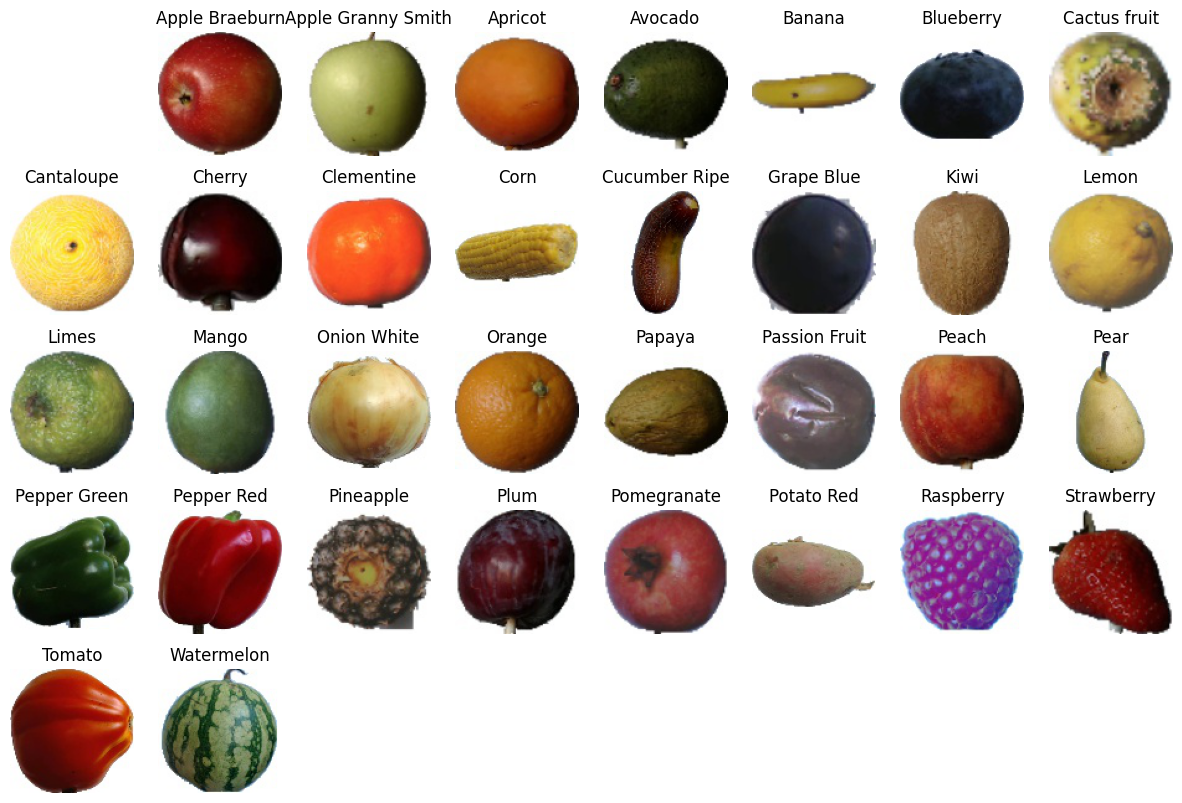

In [6]:
plt.figure(figsize = (15,10))
# View a random image from the training dataset for all classes
for i in range(1,34):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

## Prepare Data 

Let's prepare a pandas DataFrame with filepath, file name, and our target label from directory name.

In [7]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [8]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df = train_val_data_df.drop(index=0)
train_val_data_df.head()

,path,filename,label
1,./fruit-recognition/train/train/Blueberry,Blueberry_176.jpg,Blueberry
2,./fruit-recognition/train/train/Blueberry,Blueberry_162.jpg,Blueberry
3,./fruit-recognition/train/train/Blueberry,Blueberry_189.jpg,Blueberry
4,./fruit-recognition/train/train/Blueberry,Blueberry_348.jpg,Blueberry
5,./fruit-recognition/train/train/Blueberry,Blueberry_59.jpg,Blueberry


In [9]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [10]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,./fruit-recognition/test/test/,0071.jpg
1,./fruit-recognition/test/test/,4217.jpg
2,./fruit-recognition/test/test/,3578.jpg
3,./fruit-recognition/test/test/,2666.jpg
4,./fruit-recognition/test/test/,5109.jpg


Great, it looks good. Our path, filename, target label dataframe is prepared. 
Now we can split this data to create validation data also and play with it. 

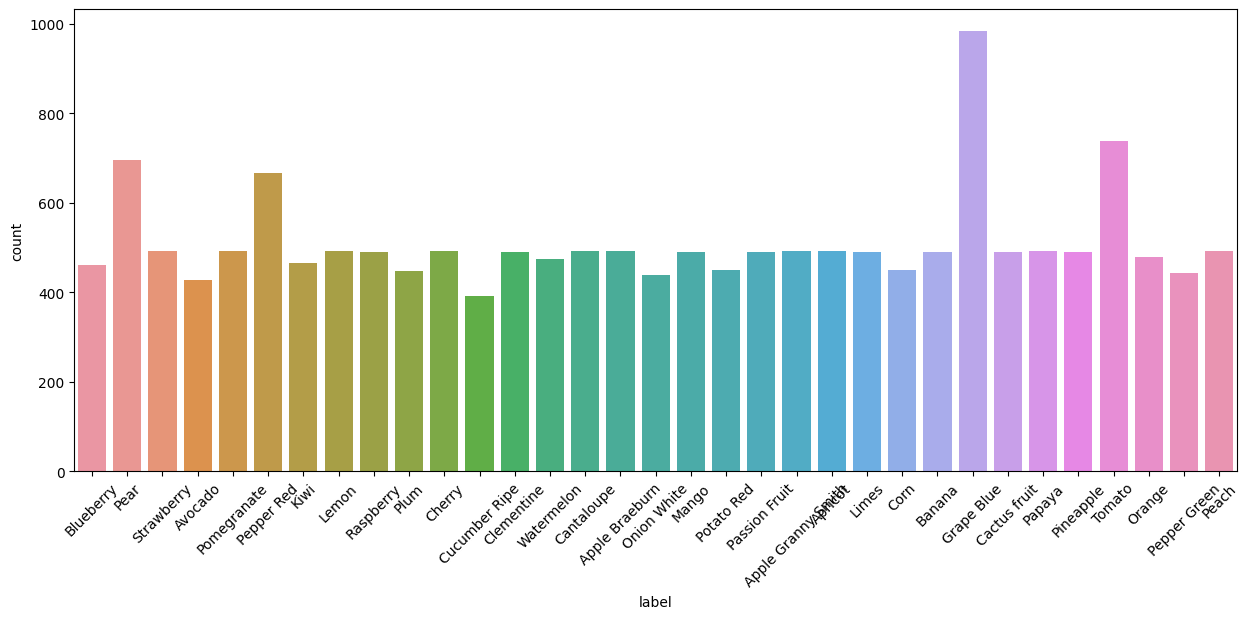

In [11]:
plt.figure(figsize = (15,6))
sns_cntplot = sns.countplot(x='label', data=train_val_data_df)
plt.xticks(rotation=45);

## Read Images and create numpy data array

In [12]:
images = []
label = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [13]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [14]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))
    
test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


### Convert class names to labels

In [15]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')


### Split the Data into Training & Validation

In [16]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)

In [17]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 34)


In [18]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Metal device set to: Apple M2
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [19]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape


### create an iterator and turn it into numpy array 
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(34,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(34,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [20]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (34,)


In [21]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (34,)


In [22]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

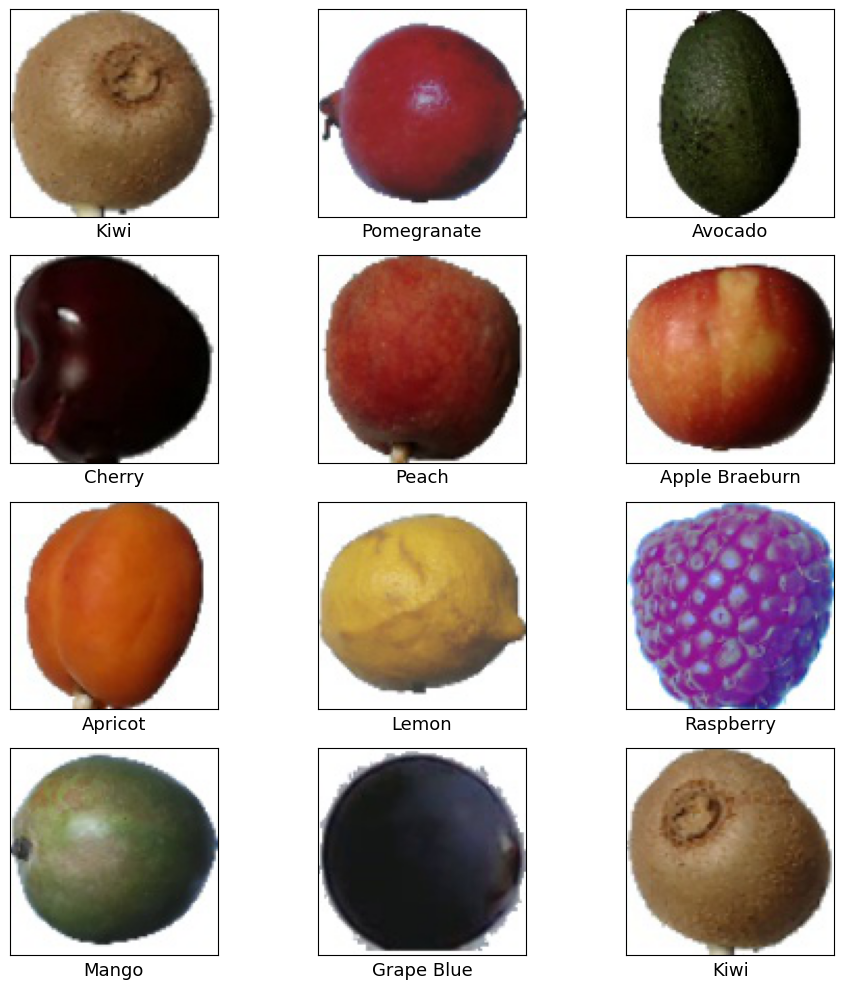

In [23]:

fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()    
plt.show()

## Data Pipeline using`tf.data` & Prefetching

In [51]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

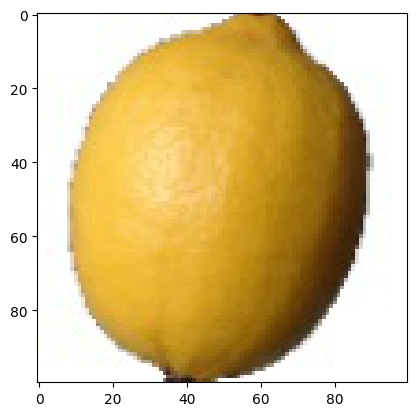

In [52]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [53]:
BATCH_SIZE = 200 
AUTOTUNE = tf.data.AUTOTUNE 

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)
    
    #batch the data 
    ds = ds.batch(BATCH_SIZE)
    
    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [54]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

## Prepare ML Model & Train

In [55]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='sigmoid',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='sigmoid',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = 'sigmoid',
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.legacy.Adam(),
               metrics = ['accuracy'])

In [56]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 128)     

In [57]:
#Fit the model on training data 
history_1 = model_1.fit(train_ds,
                       epochs =350,
                       validation_data= val_ds)

Epoch 1/350
68/68 [==============================] - 22s 314ms/step - loss: 3.4959 - accuracy: 0.0561 - val_loss: 3.4862 - val_accuracy: 0.0584
Epoch 2/350
68/68 [==============================] - 21s 310ms/step - loss: 3.4869 - accuracy: 0.0568 - val_loss: 3.4842 - val_accuracy: 0.0584
Epoch 3/350
68/68 [==============================] - 21s 309ms/step - loss: 3.4851 - accuracy: 0.0584 - val_loss: 3.4812 - val_accuracy: 0.0584
Epoch 4/350
68/68 [==============================] - 21s 306ms/step - loss: 3.4835 - accuracy: 0.0584 - val_loss: 3.4806 - val_accuracy: 0.0584
Epoch 5/350
68/68 [==============================] - 21s 307ms/step - loss: 3.4837 - accuracy: 0.0584 - val_loss: 3.4799 - val_accuracy: 0.0584
Epoch 6/350
68/68 [==============================] - 26s 375ms/step - loss: 3.4826 - accuracy: 0.0584 - val_loss: 3.4793 - val_accuracy: 0.0584
Epoch 7/350
68/68 [==============================] - 21s 309ms/step - loss: 3.4826 - accuracy: 0.0584 - val_loss: 3.4800 - val_accuracy:

68/68 [==============================] - 21s 304ms/step - loss: 0.1084 - accuracy: 0.9652 - val_loss: 0.0266 - val_accuracy: 0.9947
Epoch 114/350
68/68 [==============================] - 21s 306ms/step - loss: 0.0937 - accuracy: 0.9708 - val_loss: 0.0421 - val_accuracy: 0.9899
Epoch 115/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0982 - accuracy: 0.9704 - val_loss: 0.0944 - val_accuracy: 0.9691
Epoch 116/350
68/68 [==============================] - 21s 305ms/step - loss: 0.1002 - accuracy: 0.9687 - val_loss: 0.0410 - val_accuracy: 0.9902
Epoch 117/350
68/68 [==============================] - 21s 305ms/step - loss: 0.0890 - accuracy: 0.9737 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 118/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0951 - accuracy: 0.9700 - val_loss: 0.0251 - val_accuracy: 0.9944
Epoch 119/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0894 - accuracy: 0.9723 - val_loss: 0.0386 - val_accuracy:

68/68 [==============================] - 22s 316ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0243 - val_accuracy: 0.9920
Epoch 226/350
68/68 [==============================] - 21s 311ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 227/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 228/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 229/350
68/68 [==============================] - 21s 304ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 230/350
68/68 [==============================] - 21s 308ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0144 - val_accuracy: 0.9950
Epoch 231/350
68/68 [==============================] - 21s 305ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0038 - val_accuracy:

68/68 [==============================] - 21s 305ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 338/350
68/68 [==============================] - 21s 307ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 339/350
68/68 [==============================] - 21s 305ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 340/350
68/68 [==============================] - 21s 305ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 341/350
68/68 [==============================] - 21s 306ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 5.8847e-04 - val_accuracy: 1.0000
Epoch 342/350
68/68 [==============================] - 21s 305ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0066 - val_accuracy: 0.9973
Epoch 343/350
68/68 [==============================] - 21s 306ms/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 6.5990e-04 - val_a

## Evaluate the model 

In [58]:
model_1.evaluate(val_ds)

17/17 [==============================] - 2s 104ms/step - loss: 0.0021 - accuracy: 0.9994


[0.0021422526333481073, 0.9994067549705505]

<Axes: >

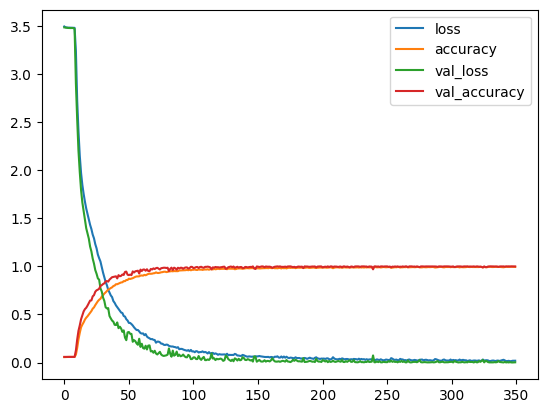

In [59]:
#loss and accuracy plot 
pd.DataFrame(history_1.history).plot()

## Prepare prediction on Validation data

In [60]:
y_pred = model_1.predict(val_ds)

17/17 [==============================] - 2s 92ms/step


In [61]:

y_pred[:1]

array([[3.3054032e-11, 1.3890545e-07, 5.2062155e-08, 8.3632490e-11,
        2.0420712e-05, 6.2247634e-09, 2.0846791e-09, 2.8849901e-05,
        2.8242907e-18, 4.4043610e-12, 1.9063671e-14, 1.0983627e-12,
        9.1298843e-06, 1.1431038e-10, 4.2402621e-07, 3.1010300e-15,
        2.2016479e-11, 1.1284110e-06, 1.2758437e-13, 4.1119183e-12,
        9.9993181e-01, 1.0615719e-12, 6.2759881e-08, 3.6437850e-08,
        1.1061150e-08, 7.1001421e-10, 7.6553043e-08, 1.2346086e-11,
        2.9100184e-07, 1.2240265e-09, 2.2937553e-11, 7.5792013e-06,
        1.0072362e-09, 2.1233008e-08]], dtype=float32)

Our model prediction are in form of probability since we used softmax activation function in output layer. For finding the class we need to find max probability assigned to the class using argmax().

In [62]:
y_pred.shape  #shape of y_pred

(3371, 34)

In [63]:
y_pred = tf.argmax(y_pred, axis=1) # Get y_pred classes 

In [64]:
y_true = np.argmax(valid_lab,axis=1)

In [65]:
y_true, y_pred

(array([20, 13, 13, ..., 33,  7, 23]),
 <tf.Tensor: shape=(3371,), dtype=int64, numpy=array([20, 13, 13, ..., 33,  7, 23])>)

In [66]:
len(y_pred), len(y_true)

(3371, 3371)

Great, now both y_pred and y_true are in same format. We can now compare to find the accuracy and create confusion matrix.

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 99,   0,   0, ...,   0,   0,   0],
       [  0,  99,   0, ...,   0,   0,   0],
       [  0,   0,  99, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  98,   0,   0],
       [  0,   0,   0, ...,   0, 148,   0],
       [  0,   0,   0, ...,   0,   0,  95]])

<Axes: >

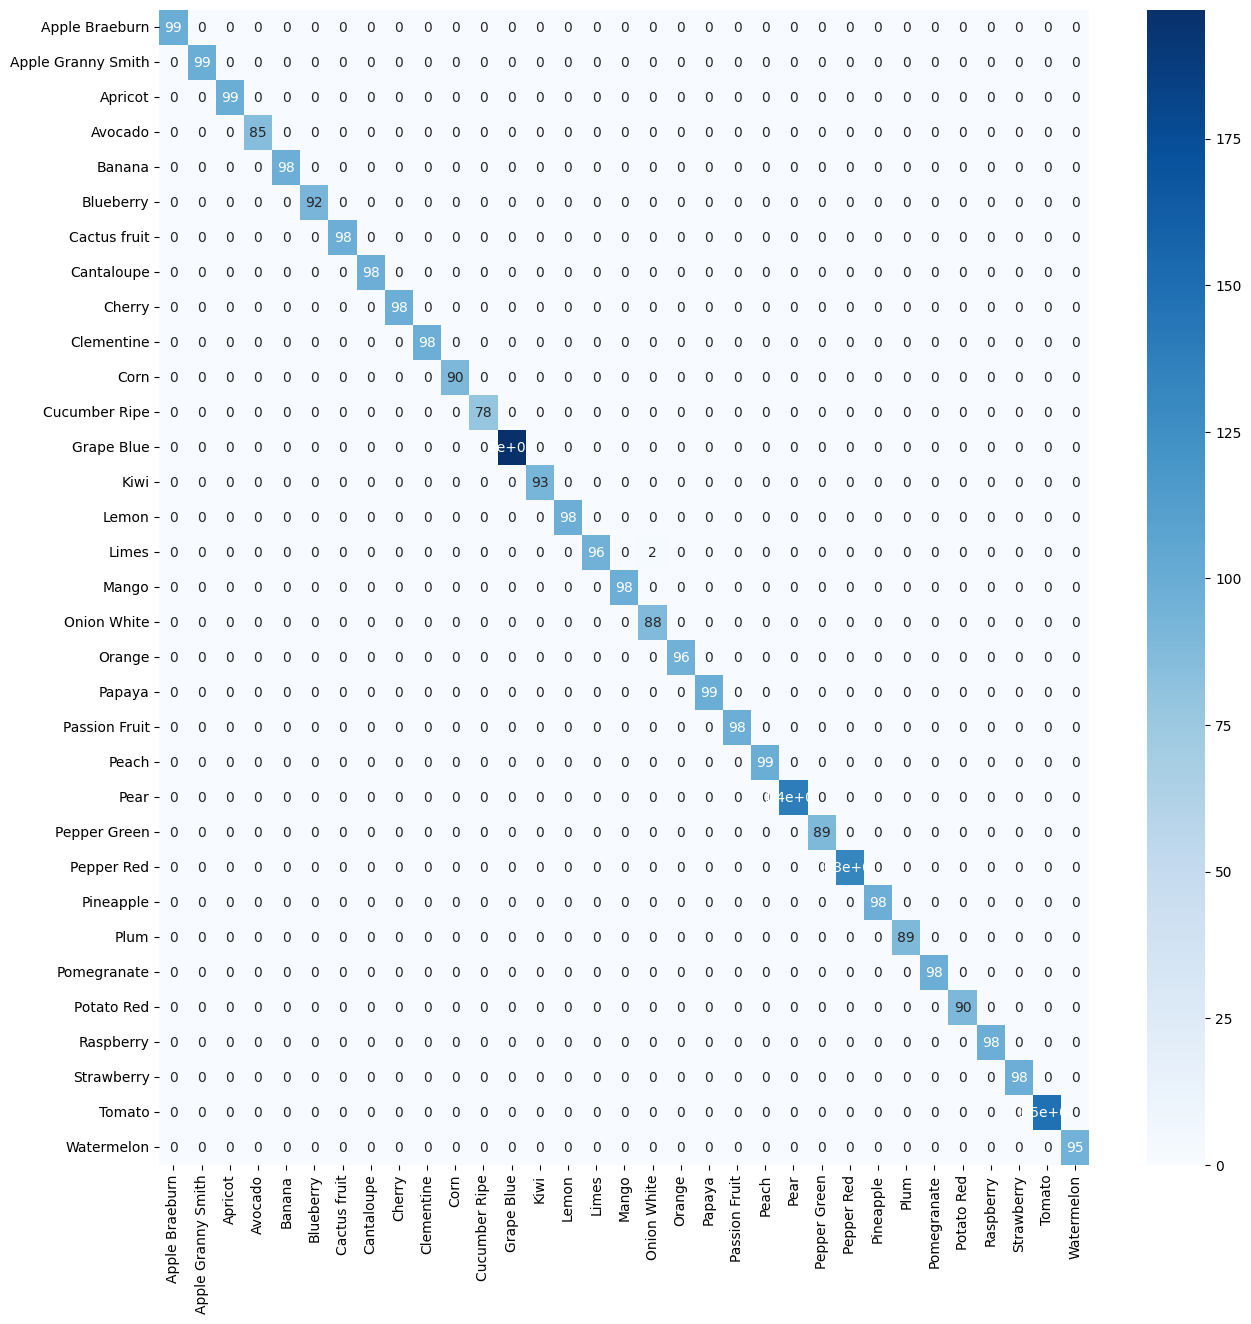

In [68]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names[1:], columns = class_names[1:]), annot = True, cmap="Blues")

## Prediction on test data

In [69]:
predictions = model_1.predict(test_ds)

29/29 [==============================] - 2s 71ms/step


In [70]:
predictions.shape

(5641, 34)

In [71]:
predictions = class_names[tf.argmax(predictions, axis=1)] # Get classes 
predictions[:5]

array(['Peach', 'Passion Fruit', 'Clementine', 'Pear', 'Cactus fruit'],
      dtype='<U18')

In [72]:
predictions.shape

(5641,)

## Prepare Submission file

In [73]:
submission = pd.read_csv("./fruit-recognition/sampleSubmission.csv")
submission.head(2)

,id,label
0,0,Apple Braeburn
1,1,Apple Braeburn


In [74]:
test_data_df.head() # We already have this data. lets take filename from this

,path,filename
0,./fruit-recognition/test/test/,0071.jpg
1,./fruit-recognition/test/test/,4217.jpg
2,./fruit-recognition/test/test/,3578.jpg
3,./fruit-recognition/test/test/,2666.jpg
4,./fruit-recognition/test/test/,5109.jpg


In [75]:
submission['id'] = test_data_df['filename']
submission['label'] = predictions

In [76]:
submission.head()

,id,label
0,0071.jpg,Peach
1,4217.jpg,Passion Fruit
2,3578.jpg,Clementine
3,2666.jpg,Pear
4,5109.jpg,Cactus fruit


In [77]:
submission.to_csv("submission2.csv",index=False)